In [61]:
import os
import sqlite3
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [62]:
data = 'C:/KULIAH/SEMESTER 3/INFRASTRUKTUR & PLATFORM UNTUK SAINS DATA/CoffeeShop_Dataset.db'

In [63]:
# Membuat connection ke database CoffeeShop
conn = sqlite3.connect(data)

# Membuat cursor object untuk memanggil SQL statement
cur = conn.cursor()

In [64]:
# Mengecek terdapat tabel apa saja di CoffeeShop_Dataset.db
cur.execute("""
              SELECT
                  name
              FROM sqlite_master
              WHERE type='table'
            """)

print(cur.fetchall())

[('sales outlet',), ('pastry inventory',), ('product',), ('generations',), ('sales reciepts',), ('customer',)]


In [65]:
# Menampilkan tabel sales outlet dalam bentuk dataframe
sales_outlet = pd.read_sql_query('SELECT * FROM "sales outlet"', conn)
sales_outlet

,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,NaN,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
3,5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
4,6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side
5,7,retail,1200,224 E 57th Street,New York,NY,287-817-2330,10021,-73.960000,40.770000,26.0,Upper East Side
6,8,retail,1500,687 9th Avenue,New York,NY,652-212-7020,10036,-73.990338,40.761887,31.0,Hell's Kitchen
7,9,retail,1700,175 8th Avenue,New York,NY,242-212-0080,10011,-74.000502,40.742760,36.0,Chelsea
8,10,retail,1600,183 W 10th Street,New York,NY,674-646-6434,10014,-74.002722,40.734367,41.0,Greenwich Village


In [66]:
sales_outlet = pd.read_sql_query('SELECT * FROM "sales outlet"', conn)
pastry_inventory = pd.read_sql_query('SELECT * FROM "pastry inventory"', conn)
product = pd.read_sql_query('SELECT * FROM "product"', conn)
generasi = pd.read_sql_query('SELECT * FROM "generations"', conn)
sales_reciepts = pd.read_sql_query('SELECT * FROM "sales reciepts"', conn)
customer = pd.read_sql_query('SELECT * FROM "customer"', conn)

In [67]:
sales_outlet.head()


,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,NaN,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
3,5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
4,6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side


In [68]:
pastry_inventory.head()


,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%


In [69]:
product.head()


,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N


In [70]:
generasi.head()


,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers


In [71]:
sales_reciepts.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [72]:
customer.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951


In [73]:
sales_outlet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sales_outlet_id       9 non-null      int64  
 1   sales_outlet_type     9 non-null      object 
 2   store_square_feet     9 non-null      int64  
 3   store_address         9 non-null      object 
 4   store_city            9 non-null      object 
 5   store_state_province  9 non-null      object 
 6   store_telephone       9 non-null      object 
 7   store_postal_code     9 non-null      int64  
 8   store_longitude       9 non-null      float64
 9   store_latitude        9 non-null      float64
 10  manager               8 non-null      float64
 11  Neighorhood           9 non-null      object 
dtypes: float64(3), int64(3), object(6)
memory usage: 996.0+ bytes


In [74]:
pastry_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_outlet_id   307 non-null    int64 
 1   transaction_date  307 non-null    object
 2   product_id        307 non-null    int64 
 3   start_of_day      307 non-null    int64 
 4   quantity_sold     307 non-null    int64 
 5   waste             307 non-null    int64 
 6   % waste           307 non-null    object
dtypes: int64(5), object(2)
memory usage: 16.9+ KB


In [75]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               88 non-null     int64  
 1   product_group            88 non-null     object 
 2   product_category         88 non-null     object 
 3   product_type             88 non-null     object 
 4   product                  88 non-null     object 
 5   product_description      88 non-null     object 
 6   unit_of_measure          88 non-null     object 
 7   current_wholesale_price  88 non-null     float64
 8   current_retail_price     88 non-null     object 
 9   tax_exempt_yn            88 non-null     object 
 10  promo_yn                 88 non-null     object 
 11  new_product_yn           88 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 8.4+ KB


In [76]:
generasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_year  70 non-null     int64 
 1   generation  70 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [77]:
sales_reciepts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  int64  
 1   transaction_date  49894 non-null  object 
 2   transaction_time  49894 non-null  object 
 3   sales_outlet_id   49894 non-null  int64  
 4   staff_id          49894 non-null  int64  
 5   customer_id       49894 non-null  int64  
 6   instore_yn        49894 non-null  object 
 7   order             49894 non-null  int64  
 8   line_item_id      49894 non-null  int64  
 9   product_id        49894 non-null  int64  
 10  quantity          49894 non-null  int64  
 11  line_item_amount  49894 non-null  float64
 12  unit_price        49894 non-null  float64
 13  promo_item_yn     49894 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 5.3+ MB


In [78]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   home_store           2246 non-null   int64 
 2   customer_first-name  2246 non-null   object
 3   customer_email       2246 non-null   object
 4   customer_since       2246 non-null   object
 5   loyalty_card_number  2246 non-null   object
 6   birthdate            2246 non-null   object
 7   gender               2246 non-null   object
 8   birth_year           2246 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 158.1+ KB


In [79]:
date = pd.to_datetime(customer['birthdate'], format='%Y-%m-%d')
date

0      1950-05-29
1      1950-07-30
2      1950-09-30
3      1950-12-01
4      1951-02-01
          ...    
2241   1977-12-10
2242   2000-12-07
2243   1996-06-04
2244   1990-03-01
2245   1966-08-27
Name: birthdate, Length: 2246, dtype: datetime64[ns]

# mencari 3 outlet dengan pengunjung terbanyak dengan profil masing generasi, misalnya boomer ada berapa dan gen z ada berapa



In [80]:
# cek generasi
jumlah_generasi = generasi['generation'].value_counts()
jumlah_generasi

generation
Gen Z                  21
Baby Boomers           19
Gen X                  15
Older Millennials      10
Younger Millennials     5
Name: count, dtype: int64

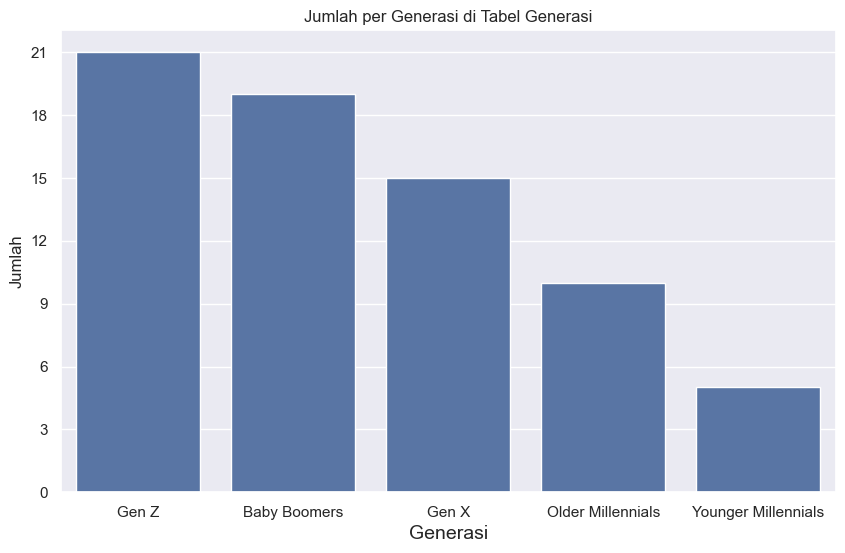

In [81]:
import matplotlib.ticker as mticker
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=jumlah_generasi.index, y=jumlah_generasi.values)
plt.title('Jumlah per Generasi di Tabel Generasi')
plt.xlabel('Generasi', fontsize=14)
plt.ylabel('Jumlah')
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.show()

In [82]:
# cek 3 outlet terbanyak
outlet_terbanyak = customer['home_store'].value_counts().head(3)
outlet_terbanyak

home_store
5    945
3    800
8    501
Name: count, dtype: int64

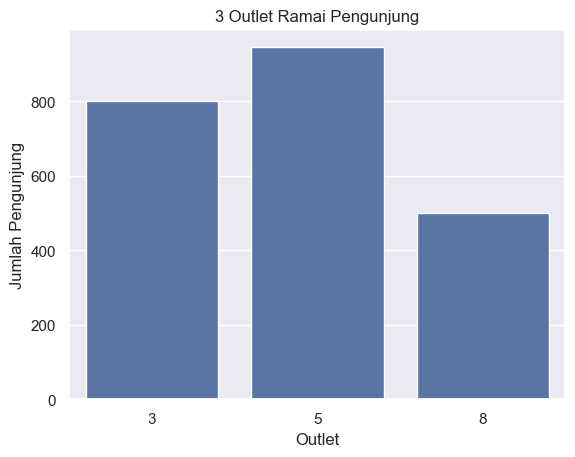

In [83]:
sns.barplot(outlet_terbanyak)
plt.title("3 Outlet Ramai Pengunjung")
plt.xlabel("Outlet")
plt.ylabel("Jumlah Pengunjung")
plt.show()

In [84]:
# gabungkan tabel generations dengan customer berdasarkan kolom generation
customer_gen = customer.merge(generasi, on='birth_year', how='left')

In [85]:
# klasifikasikan generasi berdasarkan birth_year
def classify_generation(year):
    if pd.isna(year):
        return "Unknown"
    elif 1946 <= year <= 1964:
        return "Baby Boomers"
    elif 1965 <= year <= 1980:
        return "Generation X"
    elif 1981 <= year <= 1996:
        return "Millennials"
    elif 1997 <= year <= 2012:
        return "Gen Z"
    elif year >= 2013:
        return "Gen Alpha"
    else:
        return "Unknown"

In [86]:
# Tambahkan kolom 'generation' berdasarkan 'birth_year'
customer['generation'] = customer['birth_year'].apply(classify_generation)

# 3 outlet dengan pelanggan terbanyak
top_3_outlets = customer['home_store'].value_counts().head(3).index.tolist()

# Filter data hanya untuk 3 outlet tersebut
top_3_outlets_data = customer[customer['home_store'].isin(top_3_outlets)]

In [87]:
# Buat tabel distribusi generasi per outlet
dist_table = pd.crosstab(
    index=top_3_outlets_data['home_store'],
    columns=top_3_outlets_data['generation'],
    margins=True                        
)
dist_table


generation,Baby Boomers,Gen Z,Generation X,Millennials,All
home_store,,,,,
3,229,69,252,250,800
5,172,122,200,451,945
8,128,65,119,189,501
All,529,256,571,890,2246


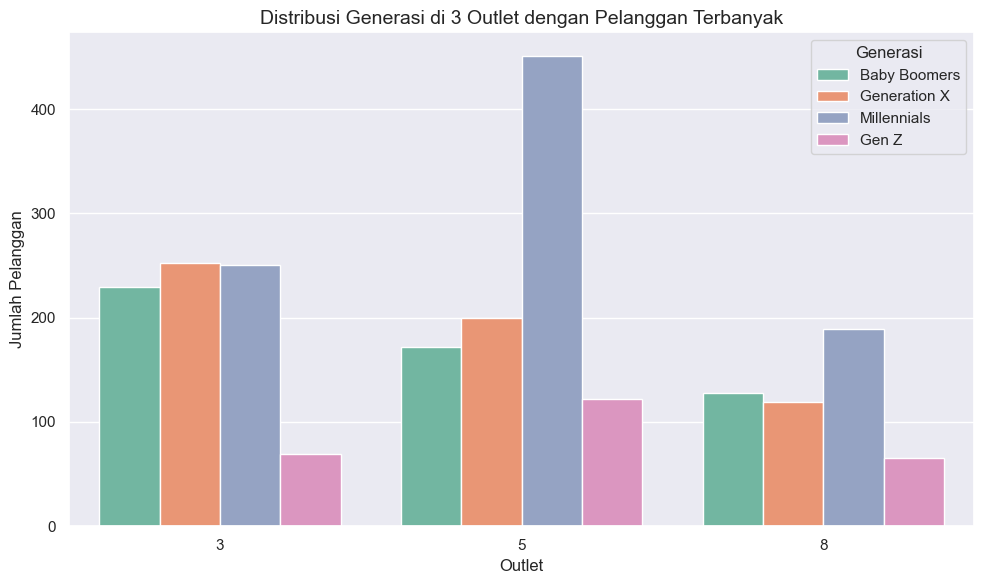

In [88]:
# plot
plt.figure(figsize=(10, 6))
sns.countplot(
    data=top_3_outlets_data,
    x='home_store',
    hue='generation',
    palette='Set2'
)

plt.title("Distribusi Generasi di 3 Outlet dengan Pelanggan Terbanyak", fontsize=14)
plt.xlabel("Outlet", fontsize=12)
plt.ylabel("Jumlah Pelanggan", fontsize=12)
plt.legend(title="Generasi")
plt.tight_layout()
plt.show()


# Mencari tiga outlet dengan pengunjung terbanyak dan jam kunjungan paling rame di outlet tersebut

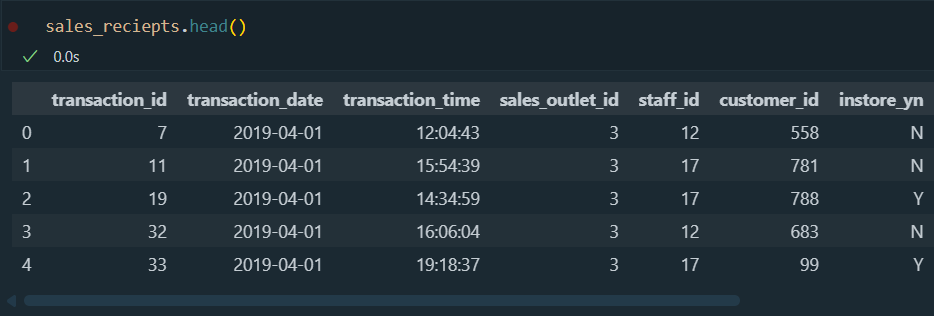

In [89]:
outlet_terbanyak = customer['home_store'].value_counts().head(3)
outlet_terbanyak

home_store
5    945
3    800
8    501
Name: count, dtype: int64

In [ ]:
# Ubah transaction_time ke format waktu dan ambil jam
sales_reciepts['transaction_time'] = pd.to_datetime(sales_reciepts['transaction_time'], errors='coerce')
sales_reciepts['visit_hour'] = sales_reciepts['transaction_time'].dt.hour


C:\Users\ASUS\AppData\Local\Temp\ipykernel_151636\1607555280.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_reciepts['transaction_time'] = pd.to_datetime(sales_reciepts['transaction_time'], errors='coerce')


In [146]:
# Cari jam kunjungan paling ramai untuk masing-masing outlet
top_outlet_hours = {}

for outlet in top_3_outlets:
    outlet_data = sales_reciepts[sales_reciepts['sales_outlet_id'] == outlet]
    most_common_hour = outlet_data['visit_hour'].value_counts().idxmax()
    count = outlet_data['visit_hour'].value_counts().max()
    total_visits = outlet_data.shape[0]
    top_outlet_hours[outlet] = {
        'jam_ter_ramai': most_common_hour,
        'jumlah_kunjungan_jam_ter_ramai': count,
        'total_kunjungan_outlet': total_visits
    }


In [148]:
# Konversi ke DataFrame agar rapi
top_outlet_hours_df = pd.DataFrame(top_outlet_hours).T.reset_index()
top_outlet_hours_df.rename(columns={'index': 'sales_outlet_id'}, inplace=True)
print(top_outlet_hours_df)

   sales_outlet_id  jam_ter_ramai  jumlah_kunjungan_jam_ter_ramai  \
0                5             10                            2053   
1                3             10                            1711   
2                8              8                            2318   

   total_kunjungan_outlet  
0                   15994  
1                   16829  
2                   17071  


In [149]:
# tabel jam kunjungan outlet teratas dengan kolom yang diinginkan
from IPython.display import display
cols = ['sales_outlet_id', 'jam_ter_ramai', 'jumlah_kunjungan_jam_ter_ramai', 'total_kunjungan_outlet']
if all(col in top_outlet_hours_df.columns for col in cols):
    display(top_outlet_hours_df[cols])
else:
    print('Kolom yang diminta tidak ditemukan:', [col for col in cols if col not in top_outlet_hours_df.columns])

,sales_outlet_id,jam_ter_ramai,jumlah_kunjungan_jam_ter_ramai,total_kunjungan_outlet
0,5,10,2053,15994
1,3,10,1711,16829
2,8,8,2318,17071


C:\Users\ASUS\AppData\Local\Temp\ipykernel_151636\3140933820.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_outlet_hours_df['sales_outlet_id'], y=top_outlet_hours_df[col], ax=ax, palette='Set2')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_151636\3140933820.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_outlet_hours_df['sales_outlet_id'], y=top_outlet_hours_df[col], ax=ax, palette='Set2')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_151636\3140933820.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_outlet_hours_df[

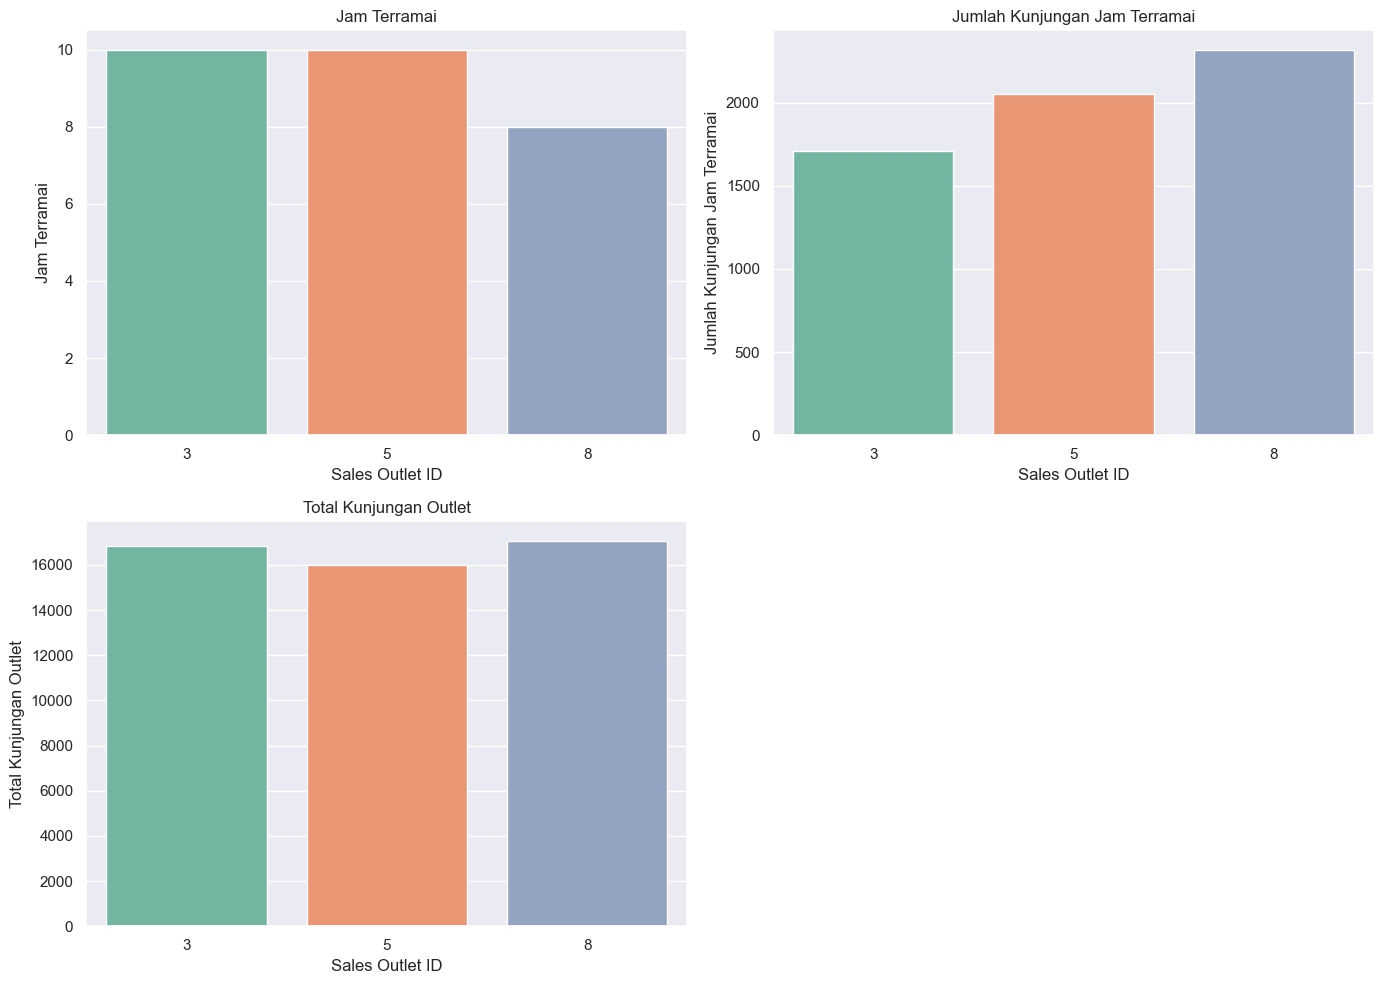

In [151]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plot_cols = ['jam_ter_ramai', 'jumlah_kunjungan_jam_ter_ramai', 'total_kunjungan_outlet']
labels = ['Jam Terramai', 'Jumlah Kunjungan Jam Terramai', 'Total Kunjungan Outlet']
for i, col in enumerate(plot_cols):
    ax = axes.flat[i]
    sns.barplot(x=top_outlet_hours_df['sales_outlet_id'], y=top_outlet_hours_df[col], ax=ax, palette='Set2')
    ax.set_title(labels[i])
    ax.set_xlabel('Sales Outlet ID')
    ax.set_ylabel(labels[i])
axes.flat[3].axis('off')
plt.tight_layout()
plt.show()